<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 1

This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [24]:
df1 = 'C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\datasets\sleep\sleep_bh.csv'
df = pd.read_csv(df1)

In [25]:
df1 = 'C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\datasets\sleep\sleep_bh.csv'
df = pd.read_csv(df1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [27]:
df.shape

(706, 34)

In [28]:
df.isnull()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [160]:
df.dropna()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
5,41,0,6,0.0,0.0,12,0,1,1,4812,...,0,1205,0,0,1205,23,0,23,19.249998,1681
6,35,0,7,0.0,0.0,12,8250,1,1,4787,...,1,2113,0,2113,0,17,1,0,1.440000,1225
7,47,0,8,0.0,0.0,13,0,1,1,3544,...,0,3608,0,3608,0,28,0,24,15.010007,2209
8,32,0,9,0.0,0.0,17,18750,1,1,4359,...,0,2353,1,2353,0,9,0,11,4.329998,1024
9,30,0,10,0.0,0.0,15,11750,1,1,4211,...,1,2851,0,2851,0,9,0,7,2.959999,900


## 3. Check for correlations
    Implement a heatmap
---

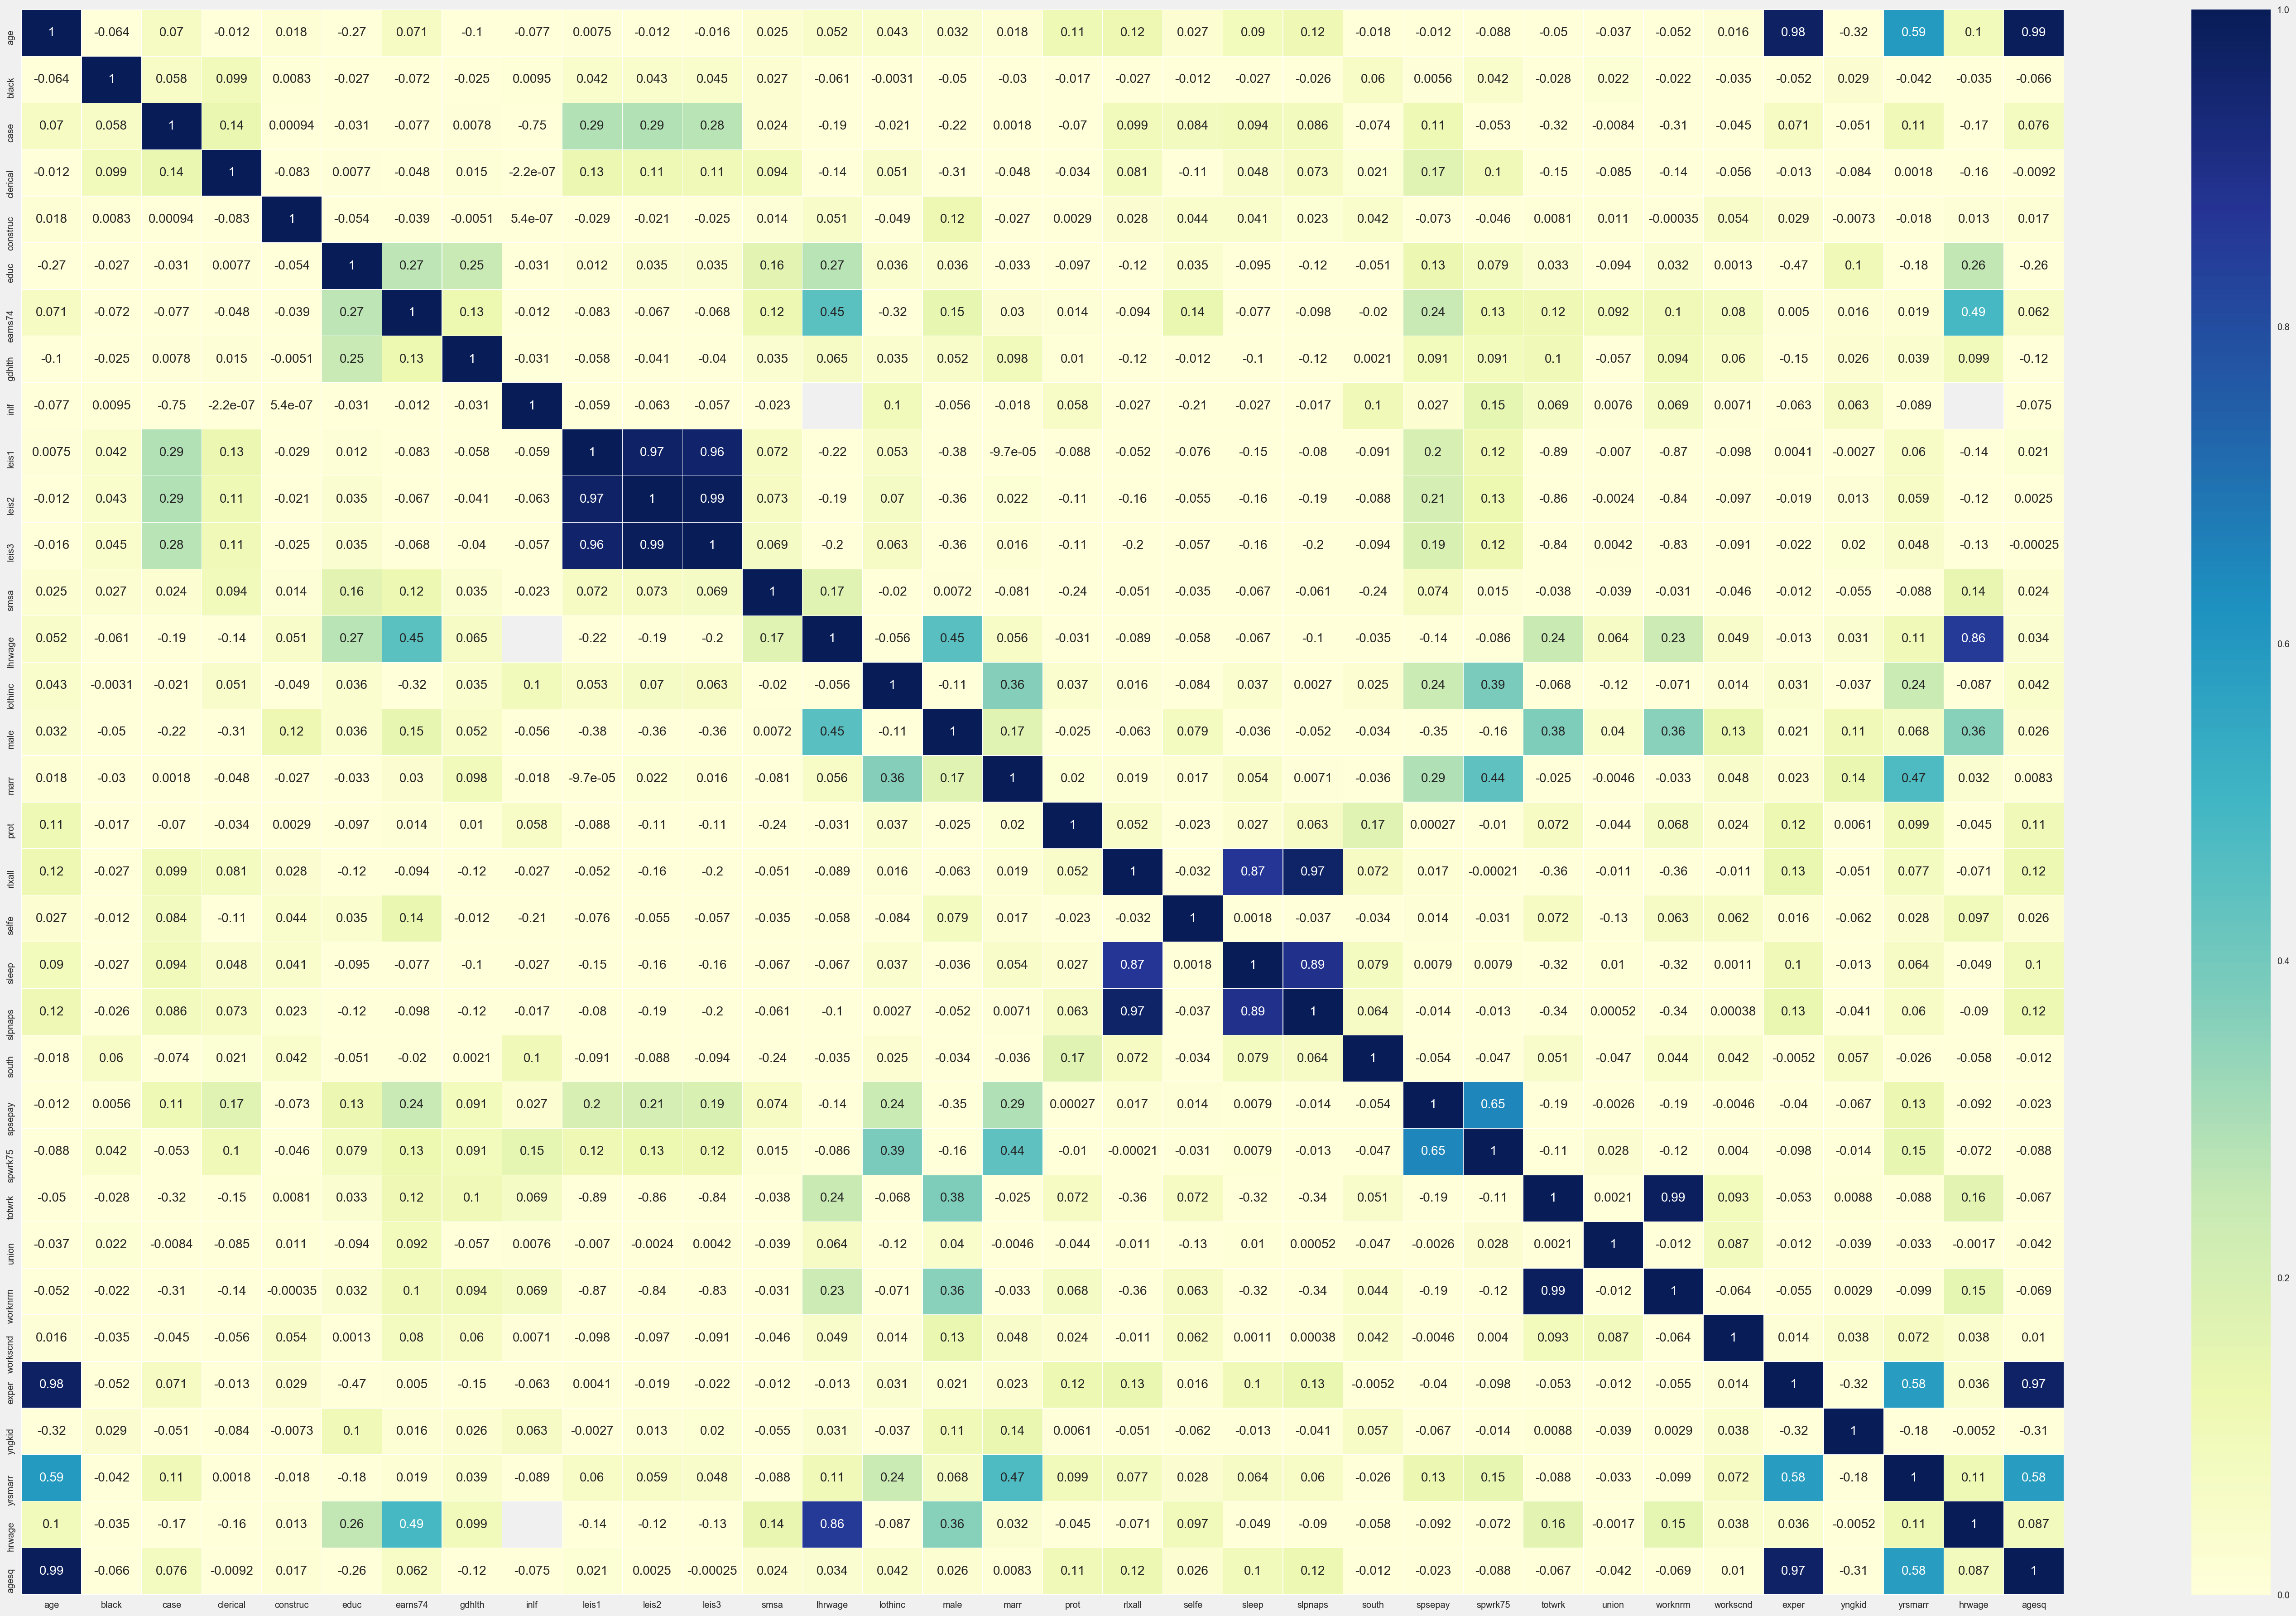

In [161]:
fig = plt.figure(figsize=(45,30))
ax = fig.gca()
sns.heatmap(sleep.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [31]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [163]:
formula1 = '''
sleep ~ agesq, age, black, clerical, construc, 
male,marr , prot -1
'''
formula1 = formula1.replace(",", "+")

In [164]:
## Defining y and X
y1, X1 = patsy.dmatrices(formula1, data=df, return_type="dataframe")
y1 = np.ravel(y1)
print (y1.shape)
print ("\n=====\n")
print (X1.shape)

(706,)

=====

(706, 8)


In [165]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.30)
print ("Shape of X train:", X1train.shape) 
print ("Shape of y train:", y1train.shape)
print ("\n=====\n")
print ("Shape of X test:", X1test.shape)
print ("Shape of y test:", y1test.shape)

('Shape of X train:', (494, 8))
('Shape of y train:', (494,))

=====

('Shape of X test:', (212, 8))
('Shape of y test:', (212,))


In [76]:
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
5,41,0,6,0.000000,0.000000,12,0,1,1,4812,...,0,1205,0,0,1205,23,0,23,19.249998,1681
6,35,0,7,0.000000,0.000000,12,8250,1,1,4787,...,1,2113,0,2113,0,17,1,0,1.440000,1225
7,47,0,8,0.000000,0.000000,13,0,1,1,3544,...,0,3608,0,3608,0,28,0,24,15.010007,2209
8,32,0,9,0.000000,0.000000,17,18750,1,1,4359,...,0,2353,1,2353,0,9,0,11,4.329998,1024
9,30,0,10,0.000000,0.000000,15,11750,1,1,4211,...,1,2851,0,2851,0,9,0,7,2.959999,900


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [166]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [167]:
ss = StandardScaler()

In [168]:
Xn = ss.fit_transform(X1)

In [169]:
print (y1.shape), (type(y1))
print ("\n=====\n")
print (Xn.shape), (type(Xn))

(706,) <type 'numpy.ndarray'>

=====

(706, 8) <type 'numpy.ndarray'>


In [170]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y1, test_size=0.30, random_state=10)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 


(494, 8) (212, 8) (494,) (212,)


In [171]:
## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(Xtrain, ytrain)


## predict values => you predict on the test, I am predict on the train so we can see how the model performs
ytrain_pred = lr.predict(Xtrain)
ytest_pred = lr.predict(Xtest)
# print(lr.coef_)
# print "====\n"

## Cross validate = 10
linreg_scores = cross_val_score(lr, Xtrain, ytrain, cv=10)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.02877249 -0.03086581 -0.06418491 -0.01010261  0.01547416 -0.03056923
 -0.01567313 -0.09103257  0.00406125 -0.08773148]
Average R^2 OLS score: -0.028


## 4.2.1 OLS
    
---

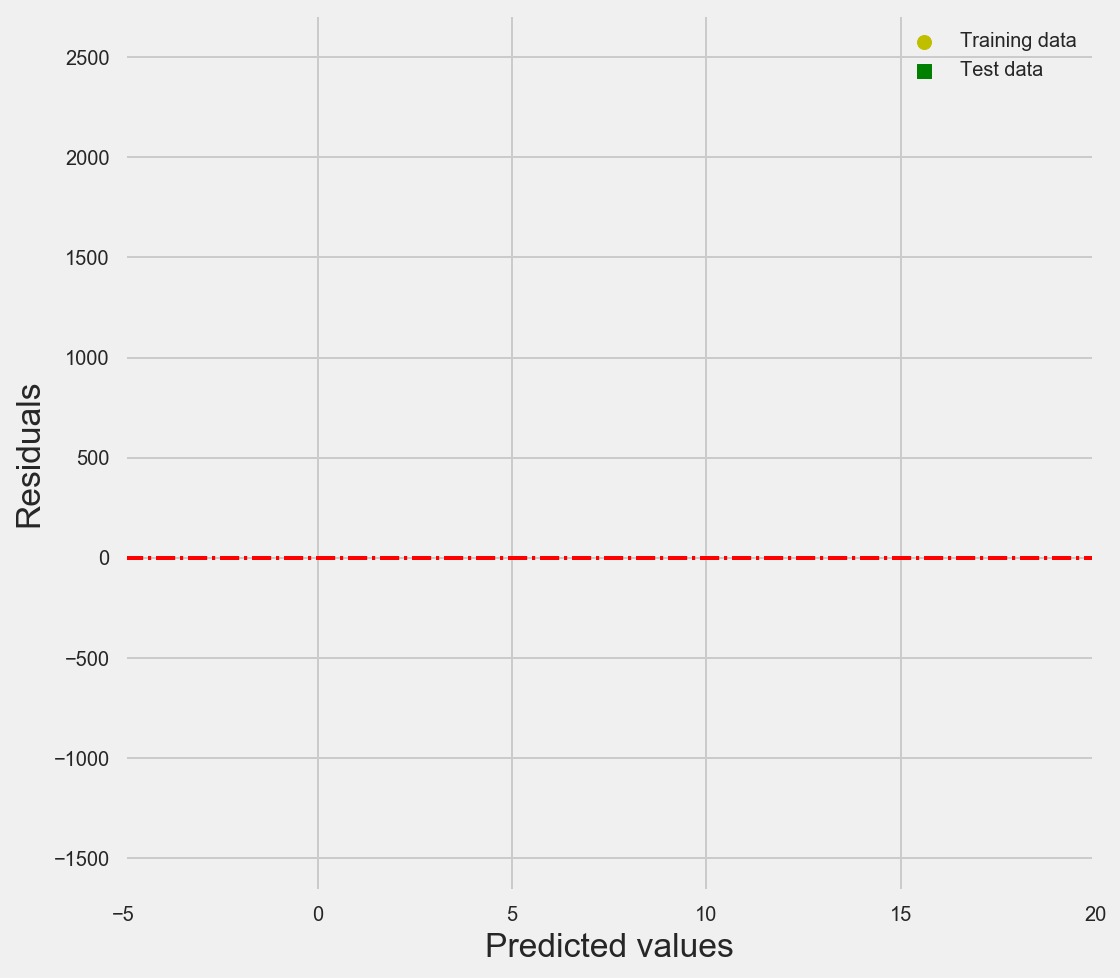

In [172]:
fig = plt.figure(figsize=(8,7))

plt.scatter(ytrain_pred,  ytrain_pred - ytrain,
            c='y', marker='o', label='Training data')

plt.scatter(ytest_pred,  ytest_pred - ytest,
            c='g', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-5, xmax=20, lw=2, linestyles= '-.', color='red')
plt.xlim([-5, 20])
plt.tight_layout()

plt.show()

## 4.2.2 Regularization
    
---

In [173]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred),
        mean_squared_error(ytest, ytest_pred)))
print('R^2 0LS train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

MSE - OLS train: 179373.196, test: 226878.503
R^2 0LS train: 0.044, test: -0.033


In [174]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [175]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtrain, ytrain)
print (optimal_ridge.alpha_)

580.522551609


In [176]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(Xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)
# print(ridge.coef_)
# print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[ 0.01842383 -0.03704546 -0.01862318  0.00982166  0.02786205 -0.00671
 -0.02842041 -0.11691902 -0.01065593 -0.05835314]
Average R^2 Ridge score: -0.022


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [177]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [178]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X1train, y1train)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

54.4018360857


........................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished


In [179]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X1train, y1train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[-0.05232949  0.01228232 -0.14141068 -0.0680191   0.02142105 -0.07319408
  0.03160313  0.05598223 -0.08117245  0.01418439]
-0.0280652683401


In [152]:
lasso_coefs = pd.DataFrame({'variable':X1.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
0,0.034945,0.034945,agesq
1,0.000000,-0.000000,age
2,0.000000,0.000000,black
3,0.000000,0.000000,clerical
4,0.000000,0.000000,construc
5,0.000000,-0.000000,male
6,0.000000,0.000000,marr
7,0.000000,-0.000000,prot


In [180]:

lasso.fit(X1train, y1train)

Lasso(alpha=54.401836085659511, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

The features which are the best predictors are the age

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [181]:
## Define y
y = df['sleep']

## Define X (exclude lothinc, case, sleep)
columns_ = df.columns.tolist()
exclude_cols = ['lothinc', 'case', 'sleep']

X = df[[i for i in columns_ if i not in exclude_cols]]

## Print shapes of y and X
print y.shape, X.shape

(706,) (706, 31)


In [182]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(494, 31) (494,)
(212, 31) (212,)


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [183]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [184]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Adeel\Anaconda2\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = r'C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
C:\Users\Adeel\Anaconda2\lib\runpy.py in _run_code(code=<code object <module> at 024C2EC0, file "C:\User...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': r'C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\Ade...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname=r'C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 024C2EC0, file "C:\User...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': r'C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\Ade...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'estimator_rfr.fit(X_train, y_train)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-03-20T21:19:54.653000', u'msg_id': u'7FFCB9B9A4944C15838A97F0953962F9', u'msg_type': u'execute_request', u'session': u'AAEB322359554D238DE38BBA2F78BF1F', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'7FFCB9B9A4944C15838A97F0953962F9', 'msg_type': u'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['AAEB322359554D238DE38BBA2F78BF1F']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'estimator_rfr.fit(X_train, y_train)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-03-20T21:19:54.653000', u'msg_id': u'7FFCB9B9A4944C15838A97F0953962F9', u'msg_type': u'execute_request', u'session': u'AAEB322359554D238DE38BBA2F78BF1F', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'7FFCB9B9A4944C15838A97F0953962F9', 'msg_type': u'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['AAEB322359554D238DE38BBA2F78BF1F'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'estimator_rfr.fit(X_train, y_train)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2017-03-20T21:19:54.653000', u'msg_id': u'7FFCB9B9A4944C15838A97F0953962F9', u'msg_type': u'execute_request', u'session': u'AAEB322359554D238DE38BBA2F78BF1F', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'7FFCB9B9A4944C15838A97F0953962F9', 'msg_type': u'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'estimator_rfr.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'estimator_rfr.fit(X_train, y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'estimator_rfr.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'estimator_rfr.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'estimator_rfr.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-184-5a8089084479>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at e6922b0, execution_co..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0E676410, file "<ipython-input-184-5a8089084479>", line 1>
        result = <ExecutionResult object at e6922b0, execution_co..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0E676410, file "<ipython-input-184-5a8089084479>", line 1>, result=<ExecutionResult object at e6922b0, execution_co..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0E676410, file "<ipython-input-184-5a8089084479>", line 1>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ElasticNet': <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>, 'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'import numpy as np\nimport scipy.stats as stat... inline\')\n\nplt.style.use(\'fivethirtyeight\')', u"df = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep'", u'df', u'df', u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep'", u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep'", u'df.describe()', u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep.csv'", u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-o...\\datasets\\sleep.csv'\nsleep = pd.read_csv(df1)", u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-o...\\sleep\\sleep_bh.csv'\nsleep = pd.read_csv(df1)", u'df.describe()', u'sleep.info()', u'sleep.shape()', u'sleep.shape', u'sleep.isnull()', u'sleep.dropna()', u'fig = plt.figure(figsize=(18,10))\nax = fig.gc...map="YlGnBu", vmin=0, vmax=1, ax=ax)\nplt.show()', u'fig = plt.figure(figsize=(10,10))\nax = fig.gc...map="YlGnBu", vmin=0, vmax=1, ax=ax)\nplt.show()', u'fig = plt.figure(figsize=(25,10))\nax = fig.gc...map="YlGnBu", vmin=0, vmax=1, ax=ax)\nplt.show()', ...], 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3: r'C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\datasets\sleep', 4: r'C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\datasets\sleep', 14: (706, 34), 15:        age  black   case clerical construc   edu...   False   True  False  

[706 rows x 34 columns], 16:      age  black  case  clerical  construc  educ ...
531   2.309999   1521  

[532 rows x 34 columns], 23:      age  black  case  clerical  construc  educ ...
705        NaN    900  

[706 rows x 34 columns], 27: (706, 34), 28:        age  black   case clerical construc   edu...   False   True  False  

[706 rows x 34 columns], 29:      age  black  case  clerical  construc  educ ...
705        NaN    900  

[706 rows x 34 columns], 76:      age  black  case  clerical  construc  educ ...
705        NaN    900  

[706 rows x 34 columns], ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ElasticNet': <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>, 'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', u'import numpy as np\nimport scipy.stats as stat... inline\')\n\nplt.style.use(\'fivethirtyeight\')', u"df = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep'", u'df', u'df', u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep'", u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep'", u'df.describe()', u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-omerqureshi84\\datasets\\sleep.csv'", u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-o...\\datasets\\sleep.csv'\nsleep = pd.read_csv(df1)", u"df1 = 'C:\\Users\\Adeel\\Desktop\\ECON628-01-o...\\sleep\\sleep_bh.csv'\nsleep = pd.read_csv(df1)", u'df.describe()', u'sleep.info()', u'sleep.shape()', u'sleep.shape', u'sleep.isnull()', u'sleep.dropna()', u'fig = plt.figure(figsize=(18,10))\nax = fig.gc...map="YlGnBu", vmin=0, vmax=1, ax=ax)\nplt.show()', u'fig = plt.figure(figsize=(10,10))\nax = fig.gc...map="YlGnBu", vmin=0, vmax=1, ax=ax)\nplt.show()', u'fig = plt.figure(figsize=(25,10))\nax = fig.gc...map="YlGnBu", vmin=0, vmax=1, ax=ax)\nplt.show()', ...], 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3: r'C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\datasets\sleep', 4: r'C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\datasets\sleep', 14: (706, 34), 15:        age  black   case clerical construc   edu...   False   True  False  

[706 rows x 34 columns], 16:      age  black  case  clerical  construc  educ ...
531   2.309999   1521  

[532 rows x 34 columns], 23:      age  black  case  clerical  construc  educ ...
705        NaN    900  

[706 rows x 34 columns], 27: (706, 34), 28:        age  black   case clerical construc   edu...   False   True  False  

[706 rows x 34 columns], 29:      age  black  case  clerical  construc  educ ...
705        NaN    900  

[706 rows x 34 columns], 76:      age  black  case  clerical  construc  educ ...
705        NaN    900  

[706 rows x 34 columns], ...}, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Adeel\Desktop\ECON628-01-omerqureshi84\exams\inclass\<ipython-input-184-5a8089084479> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 estimator_rfr.fit(X_train, y_train)
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=1), X=     age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[494 rows x 31 columns], y=296    2948
169    3305
355    3683
60     2975
...343    3436
222    3151
Name: sleep, dtype: int64)
    824         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    825             Target relative to X for classification or regression;
    826             None for unsupervised learning.
    827 
    828         """
--> 829         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=1)>
        X =      age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[494 rows x 31 columns]
        y = 296    2948
169    3305
355    3683
60     2975
...343    3436
222    3151
Name: sleep, dtype: int64
        self.param_grid = {'max_depth': [3, 4, 5], 'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100]}
    830 
    831 
    832 class RandomizedSearchCV(BaseSearchCV):
    833     """Randomized search on hyper parameters.

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e...='2*n_jobs', refit=True, scoring=None, verbose=1), X=     age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[494 rows x 31 columns], y=296    2948
169    3305
355    3683
60     2975
...343    3436
222    3151
Name: sleep, dtype: int64, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    568         )(
    569             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    570                                     train, test, self.verbose, parameters,
    571                                     self.fit_params, return_parameters=True,
    572                                     error_score=self.error_score)
--> 573                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    574                 for train, test in cv)
    575 
    576         # Out is a list of triplet: score, estimator, n_test_samples
    577         n_fits = len(out)

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Mar 20 21:19:57 2017
PID: 6856                Python 2.7.13: C:\Users\Adeel\Anaconda2\python.exe
...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),      age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[494 rows x 31 columns], 296    2948
169    3305
355    3683
60     2975
...343    3436
222    3151
Name: sleep, dtype: int64, <function _passthrough_scorer>, array([ 99, 100, 101, 102, 103, 104, 105, 106, 1..., 486, 487, 488,
       489, 490, 491, 492, 493]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]), 1, {'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 5, 'min_samples_split': 3, 'n_estimators': 100}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),      age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[494 rows x 31 columns], 296    2948
169    3305
355    3683
60     2975
...343    3436
222    3151
Name: sleep, dtype: int64, <function _passthrough_scorer>, array([ 99, 100, 101, 102, 103, 104, 105, 106, 1..., 486, 487, 488,
       489, 490, 491, 492, 493]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]), 1, {'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 5, 'min_samples_split': 3, 'n_estimators': 100}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=     age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[494 rows x 31 columns], y=296    2948
169    3305
355    3683
60     2975
...343    3436
222    3151
Name: sleep, dtype: int64, scorer=<function _passthrough_scorer>, train=array([ 99, 100, 101, 102, 103, 104, 105, 106, 1..., 486, 487, 488,
       489, 490, 491, 492, 493]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]), verbose=1, parameters={'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 5, 'min_samples_split': 3, 'n_estimators': 100}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1660 
   1661     try:
   1662         if y_train is None:
   1663             estimator.fit(X_train, **fit_params)
   1664         else:
-> 1665             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method RandomForestRegressor.fit of Rando... random_state=None, verbose=0, warm_start=False)>
        X_train =      age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[395 rows x 31 columns]
        y_train = 705    2970
37     4153
206    2335
483    3368
...343    3436
222    3151
Name: sleep, dtype: int64
        fit_params = {}
   1666 
   1667     except Exception as e:
   1668         if error_score == 'raise':
   1669             raise

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=     age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[395 rows x 31 columns], y=705    2970
37     4153
206    2335
483    3368
...343    3436
222    3151
Name: sleep, dtype: int64, sample_weight=None)
    242         -------
    243         self : object
    244             Returns self.
    245         """
    246         # Validate or convert input data
--> 247         X = check_array(X, accept_sparse="csc", dtype=DTYPE)
        X =      age  black  clerical  construc  educ  earns...  22   4.239999   1600  

[395 rows x 31 columns]
    248         y = check_array(y, accept_sparse='csc', ensure_2d=False, dtype=None)
    249         if issparse(X):
    250             # Pre-sort indices to avoid that each individual tree of the
    251             # ensemble sorts the indices.

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\utils\validation.py in check_array(array=array([[  3.00000000e+01,   0.00000000e+00,   1.....23999882e+00,   1.60000000e+03]], dtype=float32), accept_sparse=['csc'], dtype=<type 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    402             array = array.astype(np.float64)
    403         if not allow_nd and array.ndim >= 3:
    404             raise ValueError("Found array with dim %d. %s expected <= 2."
    405                              % (array.ndim, estimator_name))
    406         if force_all_finite:
--> 407             _assert_all_finite(array)
        array = array([[  3.00000000e+01,   0.00000000e+00,   1.....23999882e+00,   1.60000000e+03]], dtype=float32)
    408 
    409     shape_repr = _shape_repr(array.shape)
    410     if ensure_min_samples > 0:
    411         n_samples = _num_samples(array)

...........................................................................
C:\Users\Adeel\Anaconda2\lib\site-packages\sklearn\utils\validation.py in _assert_all_finite(X=array([[  3.00000000e+01,   0.00000000e+00,   1.....23999882e+00,   1.60000000e+03]], dtype=float32))
     53     # everything is finite; fall back to O(n) space np.isfinite to prevent
     54     # false positives from overflow in sum method.
     55     if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
     56             and not np.isfinite(X).all()):
     57         raise ValueError("Input contains NaN, infinity"
---> 58                          " or a value too large for %r." % X.dtype)
        X.dtype = dtype('float32')
     59 
     60 
     61 def assert_all_finite(X):
     62     """Throw a ValueError if X contains NaN or infinity.

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
___________________________________________________________________________

In [119]:
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.formula1
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'formula1'

## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

According the to MSE and R2 the train and test model performed best as it had a positive R2. It was successful t

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

There is always a tradeoff between bias and variance when implementing models. The train and test has more bias as compared to other models, but with other models the bias is low and the variance is high.It must be noted that in the case of ridge and lasso the lambda function is the one which decides on the bias and the variance of the model. 

ANS:

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

The train and test model has high bias and low variance as it depends on the historical data to come up to conclusions. It is to be noted that in the case of ridge and lasso the bias would be dependent on the tuning factor which is embedded in the model.